In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import packages and change directory

In [2]:
import sys
import os

# Input path directory
path_directory = "/content/drive/MyDrive/Colab Notebooks/SOC_Profile_Generation"

sys.path.insert(0, path_directory)
os.chdir(path_directory)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import csv
import os.path

from classes.household import Household
from functions.rank_households import rank_households
from functions.create_profiles import create_profiles

### Load data

In [4]:
### Mobility Data

mobility_data_pkl_path =  path_directory + '/inputs/data_mop_priority.pkl'


### TANK Data (MOP):
# needed for car segment (in column [174])
mob_car_info_csv_path = path_directory + '/inputs/TANK18.csv'

### Electric Car database for car substitution
# [:,3]: Battery capacity [kWh]
# [:,4]: WLTP-consumption [kWh / 100km]
# [:,5]: Car Charging power [kW]
el_cars_csv_path = path_directory + '/inputs/Elektroauto_Datenbank.csv'

### Temperature [°C] in time period (same timesteps)
weather_csv_path = path_directory + '/inputs/Temperaturen_Deutschland_2017.csv'

### Timesteps
# Input timestep length and number of timesteps
ts_length = 10
no_of_ts = 1008
#no_of_ts = int (states_mop.shape[1])   # needs to process data first

In [5]:
### Data Processing

# pkl file
with open(mobility_data_pkl_path, 'rb') as input:
        [states_mop,speed_mop,meta_mop,meta_header_mop] = pickle.load(input)
# observe only year 2017
meta_mop_data = meta_mop[-3820:-1,]
states_mop_data = states_mop[-3820:-1,]
speed_mop_data = speed_mop[-3820:-1,]

# csv files
mob_car_info_csv = np.genfromtxt (mob_car_info_csv_path, 
                                  delimiter=";", 
                                  encoding = "ISO-8859-1")

el_cars_csv = np.genfromtxt (el_cars_csv_path, 
                             delimiter=";", 
                             encoding = "ISO-8859-1")

weather_csv = np.genfromtxt (weather_csv_path, 
                             delimiter=";", 
                             encoding = "ISO-8859-1")

### Rank households

In [6]:
# Rank households according to your input

# Choose the following main parameters (will be fulfilled)
input_number_of_occupants = 1
input_number_of_drivers = 1
input_number_of_cars = 1


# Choose the following five soft parameters and their weight.
# Fitting households will be sorted by weighted soft parameters.
# Sum of all weights = 1.0
# Find codes in Codeplan_SOC_Profile_Generation.md on github
input_income = 7
input_w_income = 0.2

input_population = 2
input_w_population = 0.2

input_year_of_birth = 1980
input_w_year_of_birth = 0.2

input_job = 1
input_w_job = 0.2

# [km / week]
input_distance = 10000
input_w_distance = 0.2

# How many households should be returned?
# Put "all", if all fitting households should be returned
quantity = 10

###

households = rank_households(meta_mop_data,
                             states_mop_data,
                             speed_mop_data,
                             no_of_ts, 
                             ts_length,
                             input_number_of_occupants,
                             input_number_of_drivers,
                             input_number_of_cars, 
                             input_income,
                             input_w_income,
                             input_population,
                             input_w_population,
                             input_year_of_birth,
                             input_w_year_of_birth,
                             input_job,
                             input_w_job,
                             input_distance,
                             input_w_distance,
                             quantity)
print(households)

/content/drive/MyDrive/Colab Notebooks/SOC_Profile_Generation/functions/rank_households.py:157: RuntimeWarning: overflow encountered in long_scalars
  job_diff = job_hh - job
/content/drive/MyDrive/Colab Notebooks/SOC_Profile_Generation/functions/rank_households.py:124: RuntimeWarning: overflow encountered in long_scalars
  income_diff = income_hh - income


Number of fitting households: 366
[4701034955, 4511021288, 4501025405, 4501023822, 4301013963, 4711030459, 4511021849, 4511020331, 4501024210, 4501026011]


### SOC Profile Generation



Household: 4701034955
Car: 1
Segment: 3

Overall energy demand, Household 4701034955 , Car 1 [kWh]: 18.6109618

Home energy demand max strategy, Household 4701034955 , Car 1 [kWh]: 12.097859066999986

Work energy demand max strategy, Household 4701034955 , Car 1 [kWh]: 8.420726317500034

Home energy demand min strategy, Household 4701034955 , Car 1 [kWh]: 8.441830894736837

Work energy demand min strategy, Household 4701034955 , Car 1 [kWh]: 12.12817951578948




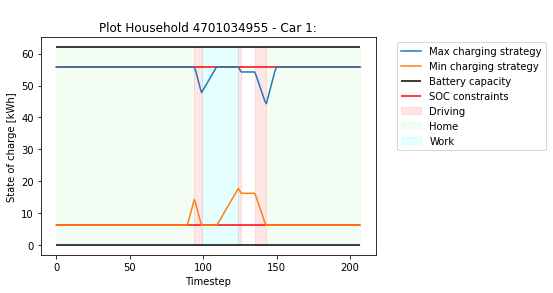





Household: 4511021288
Car: 1
Segment: [1]

Overall energy demand, Household 4511021288 , Car 1 [kWh]: 20.02705866666667

Home energy demand max strategy, Household 4511021288 , Car 1 [kWh]: 21.923403179999998

Work energy demand max strategy, Household 4511021288 , Car 1 [kWh]: 0.0

Home energy demand min strategy, Household 4511021288 , Car 1 [kWh]: 20.30642010526316

Work energy demand min strategy, Household 4511021288 , Car 1 [kWh]: 0.0




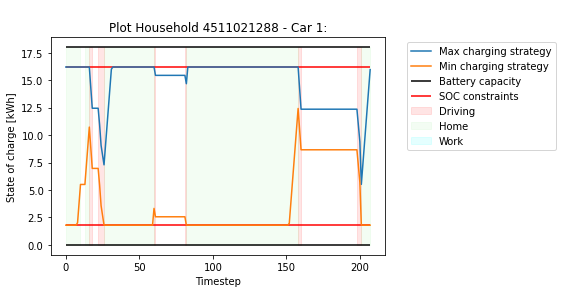





Household: 4501025405
Car: 1
Segment: [11]

Overall energy demand, Household 4501025405 , Car 1 [kWh]: 35.075998199999994

Home energy demand max strategy, Household 4501025405 , Car 1 [kWh]: 20.284209686999986

Work energy demand max strategy, Household 4501025405 , Car 1 [kWh]: 15.447078328499991

Home energy demand min strategy, Household 4501025405 , Car 1 [kWh]: 16.314740178947364

Work energy demand min strategy, Household 4501025405 , Car 1 [kWh]: 18.848252315789487




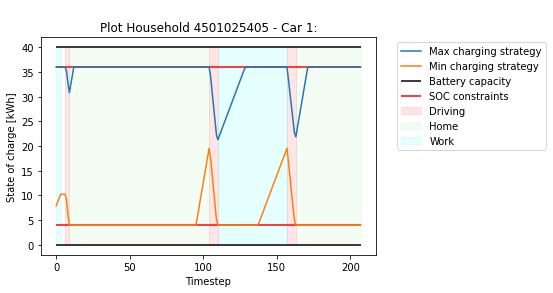





Household: 4501023822
Car: 1
Segment: 3

Overall energy demand, Household 4501023822 , Car 1 [kWh]: 19.468648

Home energy demand max strategy, Household 4501023822 , Car 1 [kWh]: 14.63987093624999

Work energy demand max strategy, Household 4501023822 , Car 1 [kWh]: 7.099938483750014

Home energy demand min strategy, Household 4501023822 , Car 1 [kWh]: 7.11773281578947

Work energy demand min strategy, Household 4501023822 , Car 1 [kWh]: 8.600946789473687




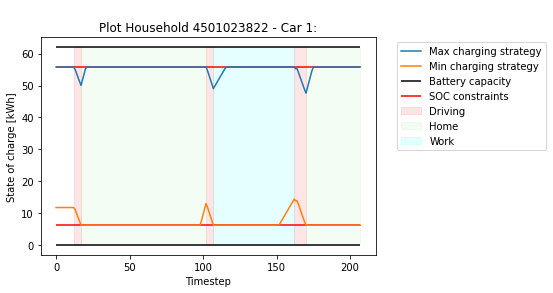





Household: 4301013963
Car: 1
Segment: [3]

Overall energy demand, Household 4301013963 , Car 1 [kWh]: 9.237383999999999

Home energy demand max strategy, Household 4301013963 , Car 1 [kWh]: 5.447534084999995

Work energy demand max strategy, Household 4301013963 , Car 1 [kWh]: 4.736681775000011

Home energy demand min strategy, Household 4301013963 , Car 1 [kWh]: 4.748553157894737

Work energy demand min strategy, Household 4301013963 , Car 1 [kWh]: 4.748553157894739




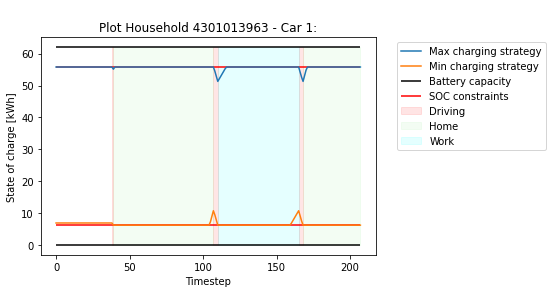





Household: 4711030459
Car: 1
Segment: 3

Overall energy demand, Household 4711030459 , Car 1 [kWh]: 0.6973820000000001

Home energy demand max strategy, Household 4711030459 , Car 1 [kWh]: 0.7688636549999991

Work energy demand max strategy, Household 4711030459 , Car 1 [kWh]: 0.0

Home energy demand min strategy, Household 4711030459 , Car 1 [kWh]: 0.7707906315789479

Work energy demand min strategy, Household 4711030459 , Car 1 [kWh]: 0.0




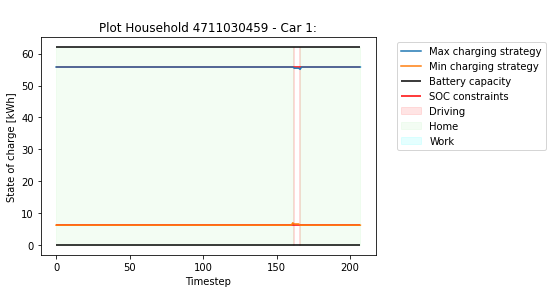





Household: 4511021849
Car: 1
Segment: [2]

Overall energy demand, Household 4511021849 , Car 1 [kWh]: 35.67202441666667

Home energy demand max strategy, Household 4511021849 , Car 1 [kWh]: 34.81689064874997

Work energy demand max strategy, Household 4511021849 , Car 1 [kWh]: 4.511516270625011

Home energy demand min strategy, Household 4511021849 , Car 1 [kWh]: 4.52282332894737

Work energy demand min strategy, Household 4511021849 , Car 1 [kWh]: 16.426691842105274




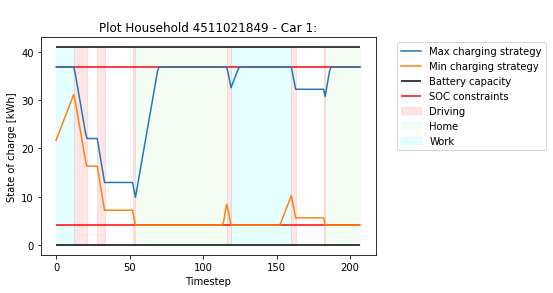





Household: 4511020331
Car: 1
Segment: [3]

Overall energy demand, Household 4511020331 , Car 1 [kWh]: 58.07642239999999

Home energy demand max strategy, Household 4511020331 , Car 1 [kWh]: 29.84382951724999

Work energy demand max strategy, Household 4511020331 , Car 1 [kWh]: 28.262500000000017

Home energy demand min strategy, Household 4511020331 , Car 1 [kWh]: 31.67527060526315

Work energy demand min strategy, Household 4511020331 , Car 1 [kWh]: 30.851959415789494




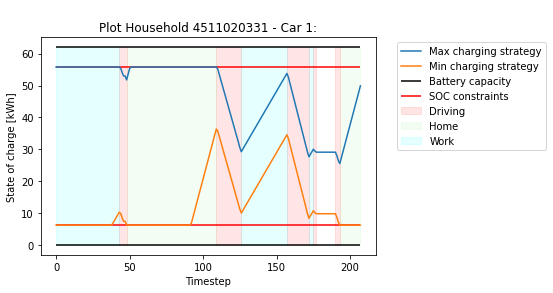





Household: 4501024210
Car: 1
Segment: [10]

Overall energy demand, Household 4501024210 , Car 1 [kWh]: 6.0918786

Home energy demand max strategy, Household 4501024210 , Car 1 [kWh]: 2.2619531654999863

Work energy demand max strategy, Household 4501024210 , Car 1 [kWh]: 3.0762179909999956

Home energy demand min strategy, Household 4501024210 , Car 1 [kWh]: 3.360243599999999

Work energy demand min strategy, Household 4501024210 , Car 1 [kWh]: 3.372885378947366




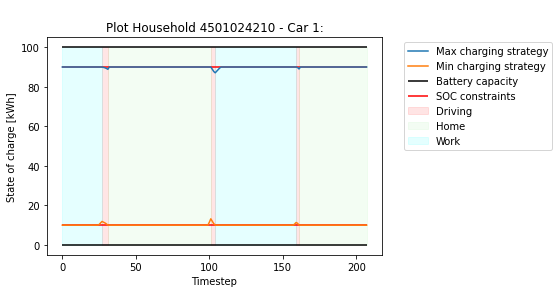





Household: 4501026011
Car: 1
Segment: [4]

Overall energy demand, Household 4501026011 , Car 1 [kWh]: 18.190040933333332

Home energy demand max strategy, Household 4501026011 , Car 1 [kWh]: 13.542782336999998

Work energy demand max strategy, Household 4501026011 , Car 1 [kWh]: 6.511737791999971

Home energy demand min strategy, Household 4501026011 , Car 1 [kWh]: 8.079860673684212

Work energy demand min strategy, Household 4501026011 , Car 1 [kWh]: 12.024921410526328




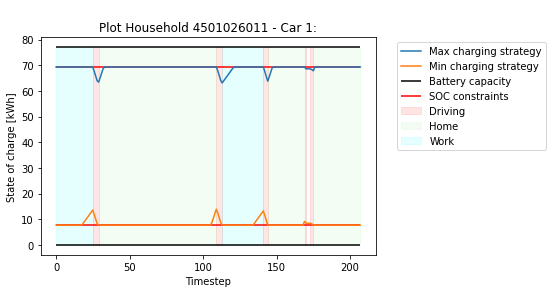

In [11]:
### Create profiles for each car from every household

'''
Choose the following parameters:
- household_list:           put "households" for whole list from rank_households
- start, end:               first and last timestep
- home_charging_power:      possible charging power at home [kW]
- work_charging_power:      -"- at work -> only one of both can be 0 [kW]
- charging_efficiency:      efficiency while charging
- discharging_efficiency:   efficiency while discharging (= consuming)
- min_charge:               SOC can not go lower (relative to battery capacity)
- max_charge:               SOC can not go higher (relative to battery capacity)
- path:                     path where csv-outputs should be saved
- bool_plot:                true, if plots should be created
- bool_create_csv:          true, if csv-files should be created
'''

household_list = households
start = 800
end = 1008
home_charging_power = 11
work_charging_power = 5
charging_efficiency = 0.95
discharging_efficiency = 0.95
min_SOC = 0.1
max_SOC = 0.9
path_csv = path_directory + '/outputs/'
bool_plot = True
bool_create_csv = False

###

create_profiles(household_list,
                meta_mop_data,
                states_mop_data,
                speed_mop_data,
                start,
                end,
                no_of_ts,
                ts_length,
                home_charging_power,
                work_charging_power,
                charging_efficiency,
                discharging_efficiency,
                min_SOC,
                max_SOC,
                weather_csv,
                mob_car_info_csv,
                el_cars_csv,
                path_csv,
                bool_plot,
                bool_create_csv)